In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\Real Estate\_PLP-ML-AI\House_data\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Chicago School\078f8f88971426ae729d919ce11e6942.jpg
D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Chicago School\0df505fa53491a9ac49ba2f00de22f2d.jpg
D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Chicago School\1d66809eff05a23dab38d79ec34777fc.jpg
D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Chicago School\20c478f272d5d14015eab8170563a454.jpg
D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Chicago School\3b6b2134568dd116206bf7ff59e7c1bd.jpg
D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Chicago School\4013de6cc22838cd0ab14fd242ecbd84.jpg
D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Chicago School\53b07aa2b907885a963ba95ee2ae1aa7.jpg
D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Chicago School\57a48b2cf75cac21cd042d06257d326f.jpg
D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Chicago School\59a2a02683d3d1264e9a46ae40b2d855.jpg
D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Chicago School\5de08c7

<>:12: SyntaxWarning: invalid escape sequence '\R'
<>:12: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Archiculture01\AppData\Local\Temp\ipykernel_13192\2105846235.py:12: SyntaxWarning: invalid escape sequence '\R'
  for dirname, _, filenames in os.walk('D:\Real Estate\_PLP-ML-AI\House_data\dataset'):


In [63]:
# !pip install python_splitter

In [64]:
import python_splitter
# If you want to create only Train-Test Folder(not Validation Folder)
python_splitter.split_from_folder("D:\Real Estate\_PLP-ML-AI\House_data\dataset", train = 0.7, test = 0.3)

<>:3: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Archiculture01\AppData\Local\Temp\ipykernel_13192\3641565826.py:3: SyntaxWarning: invalid escape sequence '\R'
  python_splitter.split_from_folder("D:\Real Estate\_PLP-ML-AI\House_data\dataset", train = 0.7, test = 0.3)


✅Checking SOURCE directory...
0.7 0 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Splitted Data

In [66]:
target_img_shape = (224,224)
train_dir = r'D:\Real Estate\_PLP-ML-AI\House_data\Train_Test_Folder\train'
val_dir = r'D:\Real Estate\_PLP-ML-AI\House_data\Train_Test_Folder\test'

In [67]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_set = train_datagen.flow_from_directory(train_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

# Augmenting training data with transformations
# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=0,      # Randomly rotate images by 20 degrees
#     width_shift_range=0.2,  # Randomly shift images horizontally (15% of the width)
#     height_shift_range=0.2, # Randomly shift images vertically (15% of the height)
#     shear_range=0.9,       # Randomly apply shearing
#     zoom_range=0.2,        # Randomly zoom inside pictures
#     horizontal_flip=True,   # Randomly flip images horizontally
#     fill_mode='nearest'     # Fill pixels when the image is rotated or shifted
# )

# train_set = train_datagen.flow_from_directory(
#     train_dir, 
#     target_size=target_img_shape, 
#     batch_size=32, 
#     class_mode='sparse'
# )

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_set = val_datagen.flow_from_directory(val_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

Found 267 images belonging to 13 classes.


Found 120 images belonging to 13 classes.


{'ML-AR-COLONIAL': 0, 'ML-AR-Chicago School': 1, 'ML-AR-Classic': 2, 'ML-AR-MEDITERRANEAN': 3, 'ML-AR-MID CENTURY': 4, 'ML-AR-Modern': 5, 'ML-AR-Modern Minimal': 6, 'ML-AR-Oriental': 7, 'ML-AR-SCANDINAVIAN': 8, 'ML-AR-THAI': 9, 'ML-AR-TRANSITIONAL': 10, 'ML-AR-TUDOR HOUSE': 11, 'ML-AR-VICTORIAN': 12}
(32, 224, 224, 3)
(32,)
class 6.0


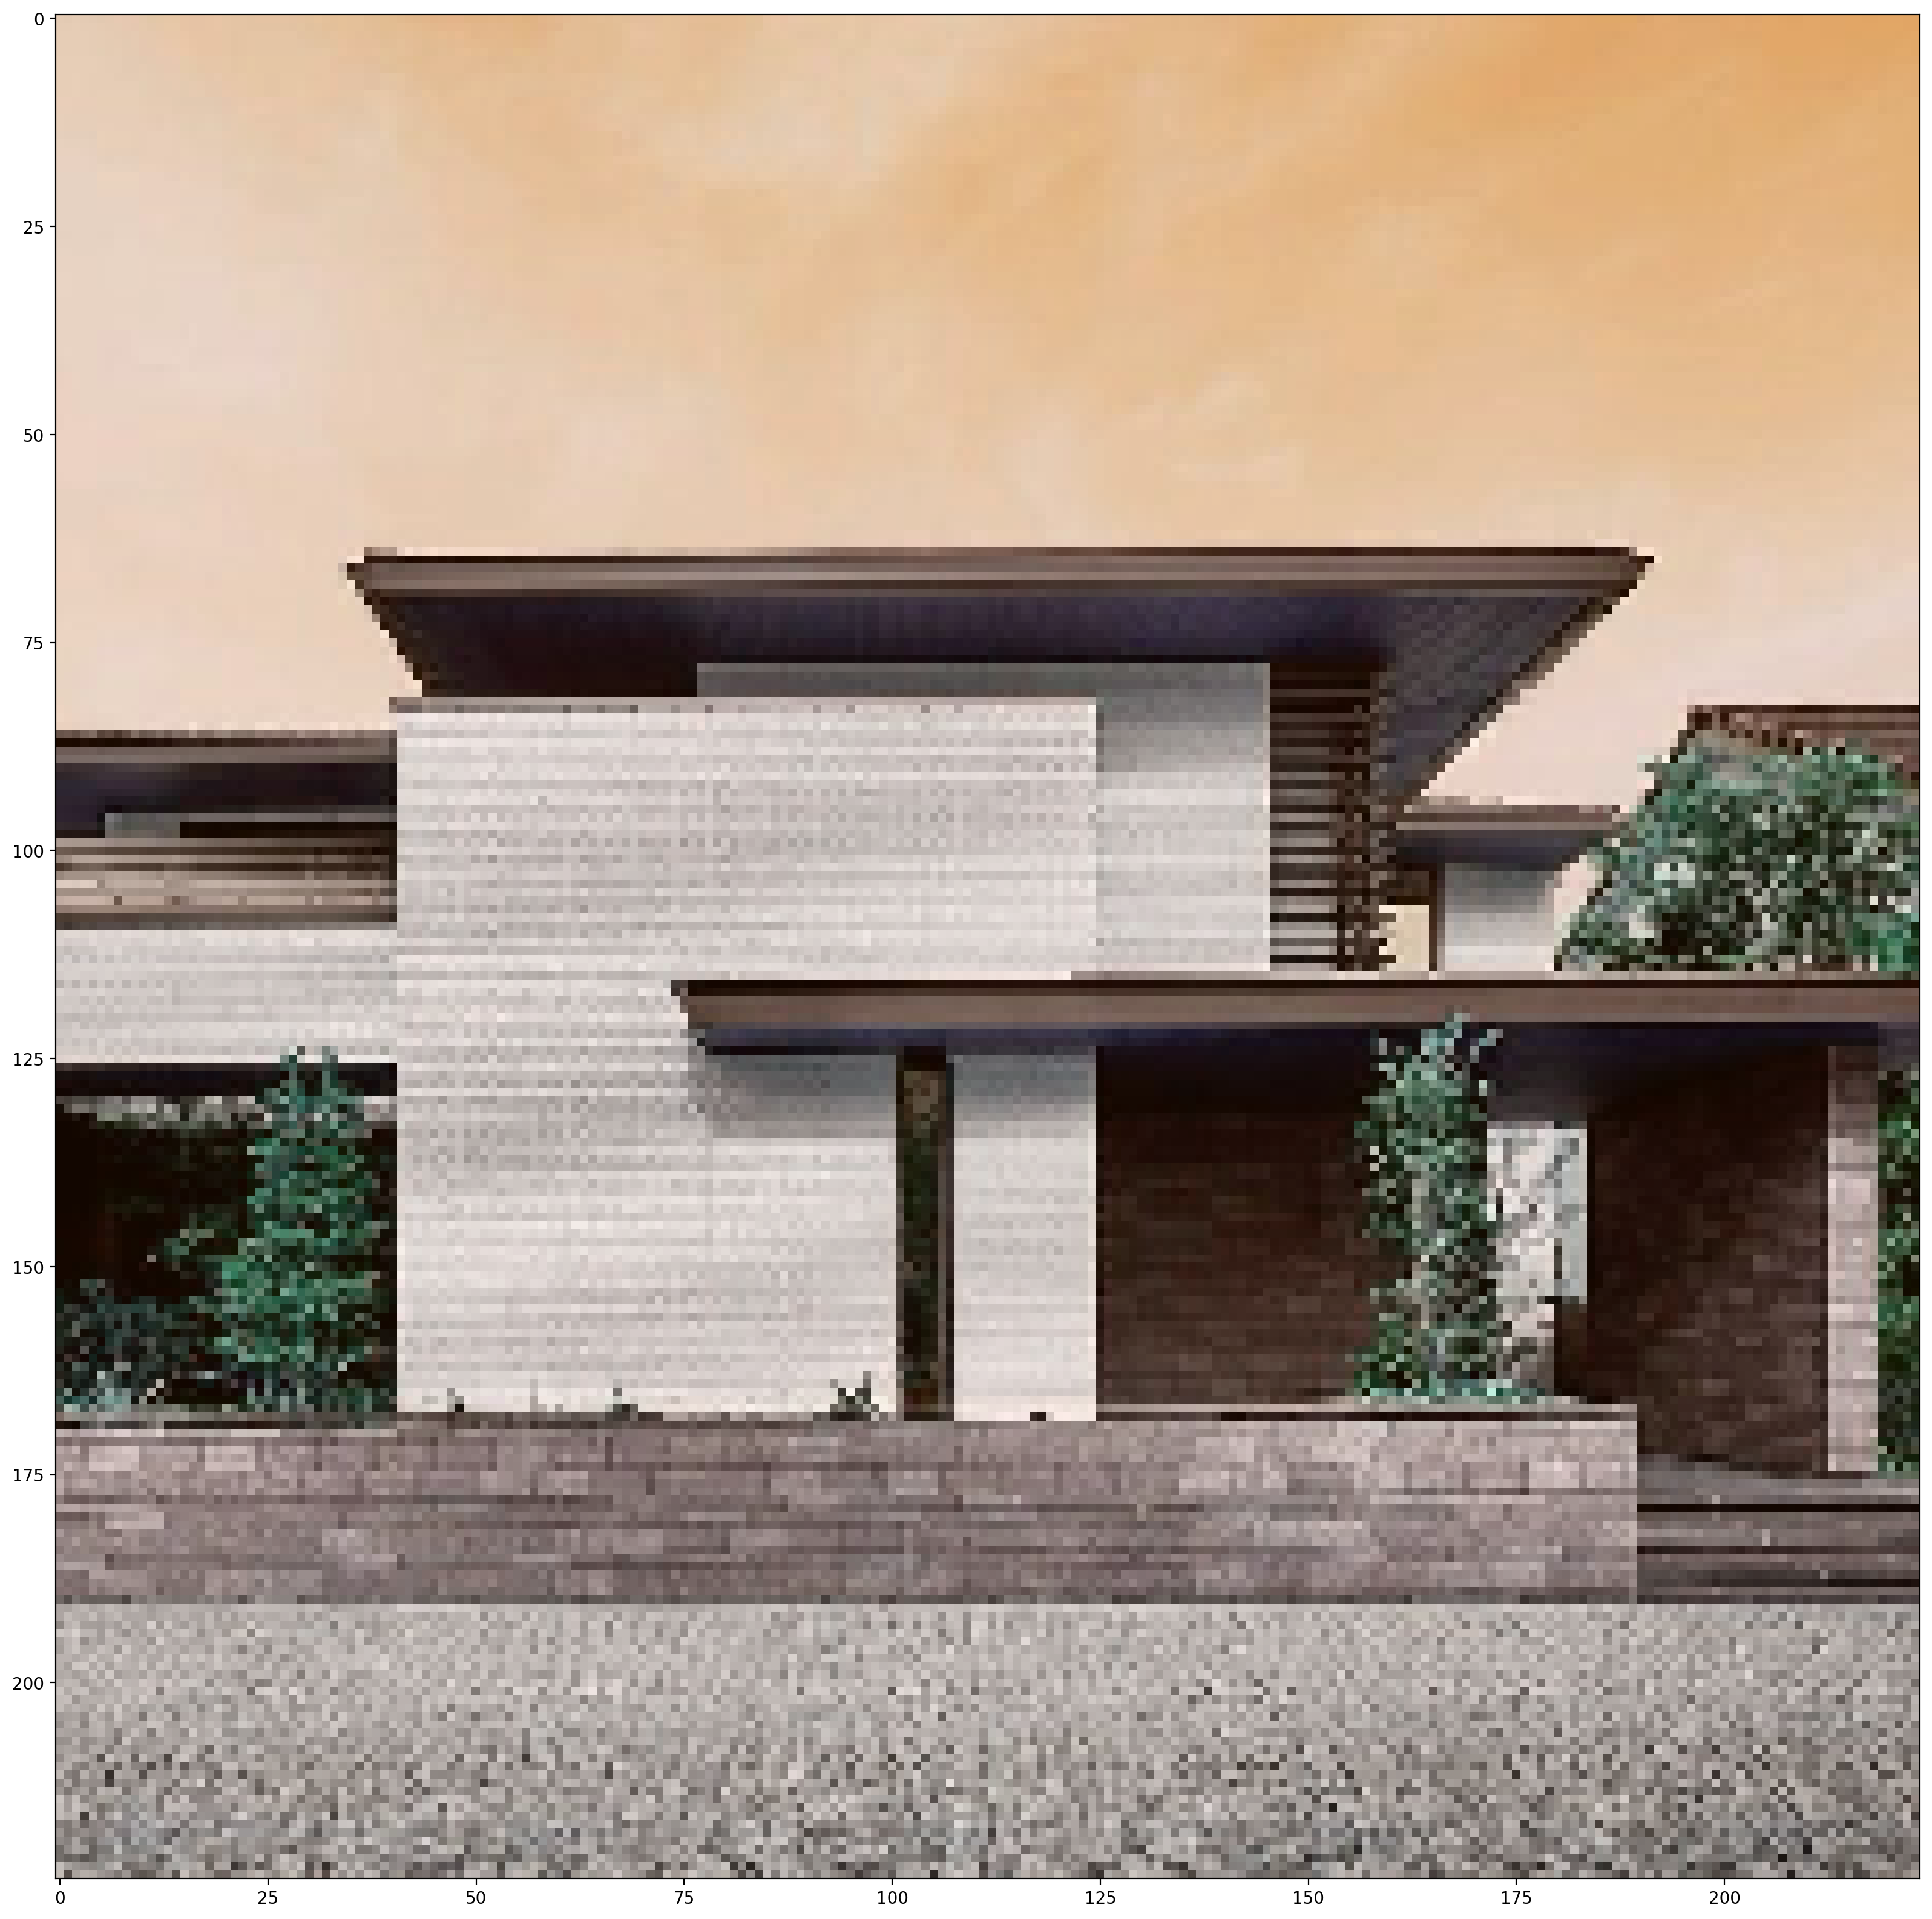

In [68]:
print(train_set.class_indices)
for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)

    img = image_batch[0] - image_batch[0].min()
    img /= 275.0
    plt.imshow(img)
    print('class', labels_batch[0])
    break

In [69]:
ids, counts = np.unique(train_set.classes, return_counts = True)
print(ids)
print(counts)
# labels = (train_set.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# labels

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[20 20 20 20 26 11 20 20 20 18 20 32 20]


In [70]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>8} = {}'.format(labels[i], counts[i]))

ML-AR-COLONIAL = 20
ML-AR-Chicago School = 20
ML-AR-Classic = 20
ML-AR-MEDITERRANEAN = 20
ML-AR-MID CENTURY = 26
ML-AR-Modern = 11
ML-AR-Modern Minimal = 20
ML-AR-Oriental = 20
ML-AR-SCANDINAVIAN = 20
ML-AR-THAI = 18
ML-AR-TRANSITIONAL = 20
ML-AR-TUDOR HOUSE = 32
ML-AR-VICTORIAN = 20


In [71]:
labels

{0: 'ML-AR-COLONIAL',
 1: 'ML-AR-Chicago School',
 2: 'ML-AR-Classic',
 3: 'ML-AR-MEDITERRANEAN',
 4: 'ML-AR-MID CENTURY',
 5: 'ML-AR-Modern',
 6: 'ML-AR-Modern Minimal',
 7: 'ML-AR-Oriental',
 8: 'ML-AR-SCANDINAVIAN',
 9: 'ML-AR-THAI',
 10: 'ML-AR-TRANSITIONAL',
 11: 'ML-AR-TUDOR HOUSE',
 12: 'ML-AR-VICTORIAN'}

In [72]:
ids, counts = np.unique(val_set.classes, return_counts = True)
print(ids)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[ 9  9  9  9 12  5  9  9  9  8  9 14  9]


In [73]:
_, train_count = np.unique(train_set.classes, return_counts = True)
_, val_count = np.unique(val_set.classes, return_counts = True)

print('Ratio Validation/Training set:', val_count/train_count * 100)

Ratio Validation/Training set: [45.         45.         45.         45.         46.15384615 45.45454545
 45.         45.         45.         44.44444444 45.         43.75
 45.        ]


In [74]:
in_shape = (target_img_shape[0], target_img_shape[1], 3)
in_shape

(224, 224, 3)

In [75]:
# Step 1: Import necessary libraries
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras.backend as K
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 3: Add custom layers for transfer learning
num_classes = 13  # Updated to 13 classes
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensionality
# x = Dense(512, activation='relu')(x)  # Fully connected layer
# x = Dropout(0.3)(x)  # Dropout for regularization
x = Dense(128, activation='relu')(x) 
x = Dropout(0.4)(x)   # Dropout to reduce overfitting
x = Dense(64, activation='relu')(x) 
x = Dropout(0.4)(x) 
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax for classification
model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [77]:
# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Prepare the data using ImageDataGenerator
train_dir = r'D:\Real Estate\_PLP-ML-AI\House_data\Train_Test_Folder\train'
val_dir = r'D:\Real Estate\_PLP-ML-AI\House_data\Train_Test_Folder\test'
train_data_dir = train_dir  # Replace with your training data path
validation_data_dir = val_dir  # Replace with your validation data path

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Step 7: Train the model
num_epochs = 100
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)



Found 267 images belonging to 13 classes.
Found 120 images belonging to 13 classes.
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.1042 - loss: 3.3039 - val_accuracy: 0.2250 - val_loss: 2.3722
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.1647 - loss: 2.5454 - val_accuracy: 0.3667 - val_loss: 2.2227
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.1674 - loss: 2.4090 - val_accuracy: 0.4167 - val_loss: 2.1133
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.2231 - loss: 2.2723 - val_accuracy: 0.4667 - val_loss: 2.0535
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.2826 - loss: 2.2044 - val_accuracy: 0.4333 - val_loss: 1.9398
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3125 - loss: 2.0211 - val_accuracy: 0.4417 - val_loss: 1.8772
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3717 - loss: 1.8510 - val_accuracy: 0.5333 - val_loss: 1.7748
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 

In [78]:
# Step 8: Grad-CAM implementation
def grad_cam(input_model, img, category_index, layer_name):
    grad_model = Model(
        inputs=[input_model.inputs],
        outputs=[input_model.get_layer(layer_name).output, input_model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.array([img]))
        loss = predictions[:, category_index]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap



In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams["figure.figsize"] = (20,20)


from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras import backend as K
from scipy.ndimage import zoom
import numpy as np
import os
import tensorflow as tf
import keras
# tf.compat.v1.disable_eager_execution()

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from scipy.ndimage import zoom

def grad_cam_plus(input_model, image, layer_name='conv5_block3_out', H=224, W=224):
    # Create a model that outputs the activations of the desired layer and predictions
    layer_output = input_model.get_layer(layer_name).output
    grad_model = tf.keras.models.Model([input_model.inputs], [layer_output, input_model.output])

    # Predict the class
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(image)
        cls = tf.argmax(predictions[0])  # Get the predicted class index
        y_c = predictions[:, cls]       # Output for the predicted class
        tape.watch(conv_output)         # Watch the convolutional layer output

    # Get gradients
    grads = tape.gradient(y_c, conv_output)  # First gradients
    conv_output_value = conv_output[0].numpy()  # Convert to NumPy
    grads_value = grads[0].numpy()

    # Compute second and third gradients
    first = grads_value
    second = grads_value * grads_value
    third = grads_value * grads_value * grads_value

    # Compute global sum for the weights
    global_sum = np.sum(conv_output_value.reshape((-1, conv_output_value.shape[-1])), axis=0)

    # Calculate alpha values
    alpha_num = second
    alpha_denom = second * 2.0 + third * global_sum.reshape((1, 1, grads_value.shape[-1]))
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, np.ones(alpha_denom.shape))
    alphas = alpha_num / alpha_denom

    # Normalize alpha values
    alpha_normalization_constant = np.sum(np.sum(alphas, axis=0), axis=0)
    alphas /= alpha_normalization_constant.reshape((1, 1, grads_value.shape[-1]))

    # Calculate the weights and Grad-CAM++ map
    weights = np.maximum(first, 0.0)
    deep_linearization_weights = np.sum((weights * alphas).reshape((-1, grads_value.shape[-1])), axis=0)
    grad_CAM_map = np.sum(deep_linearization_weights * conv_output_value, axis=2)

    # Process the Grad-CAM++ map
    cam = np.maximum(grad_CAM_map, 0)
    cam = zoom(cam, (H / cam.shape[0], W / cam.shape[1]))  # Resize to match the input image
    cam = cam / np.max(cam)  # Normalize the map

    return cam

# Visualize Grad-CAM++ as contours
def visualize_contours(img_path, cam, threshold=0.5):
    # Load and normalize the original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Ensure the image is the same size as the Grad-CAM++
    
    # Convert the heatmap to a binary mask
    heatmap = (cam * 255).astype(np.uint8)  # Scale heatmap to 0-255
    _, binary_mask = cv2.threshold(heatmap, int(threshold * 255), 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on the original image
    contoured_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 1)  # Green contours with thickness 2
    
    return contoured_img

In [93]:
images = [r"D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Classic\0bfde992c25d5e7b22fbe30e4df3ef17.jpg",
          r"D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-COLONIAL\cc1fb64822527ba290bbe117c728efc5.jpg",
          r"D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-MEDITERRANEAN\1c04c43b60952108b0777c82e4b3b59c.jpg",
          r"D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-MID CENTURY\0b0e2ad389e5d3328c904aeb03abe8ba.jpg",
          r"D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-Modern\32f24003e851b205219c8770d223c724.jpg"]

In [100]:
import numpy as np

# Assuming you have a total of 5 classes for your data
custom_class_labels = labels

def custom_decode_predictions(predictions, top=5):
    # predictions: model's output, typically a batch of arrays
    results = []
    for pred in predictions:
        # Get indices of top predictions
        top_indices = pred.argsort()[-top:][::-1]
        result = [(i, custom_class_labels[i], pred[i]) for i in top_indices]
        results.append(result)
    return results

def top_index(predictions, top=5):
    # predictions: model's output, typically a batch of arrays
    top_idx = []
    for pred in predictions:
        # Get indices of top predictions
        top_idx = pred.argsort()[-top:][::-1]
        # result = [(i, custom_class_labels[i], pred[i]) for i in top_indices]
        # results.append(result)
    return top_idx

In [83]:
# Assuming 'predictions' is the output from your model
# predictions = model.predict(img)  # 'img' is the preprocessed input
# decoded_predictions = custom_decode_predictions(predictions, top=5)

# # Print the results
# for i, pred in enumerate(decoded_predictions):
#     print(f"Image {i+1} predictions:")
#     for idx, label, score in pred:
#         print(f"  {label}: {score:.4f}")


In [101]:
print([layer.name for layer in model.layers])


['input_layer_6', 'conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'pool1_pad', 'pool1_pool', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_0_bn', 'conv2_block1_3_bn', 'conv2_block1_add', 'conv2_block1_out', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_3_bn', 'conv2_block2_add', 'conv2_block2_out', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'conv2_block3_3_conv', 'conv2_block3_3_bn', 'conv2_block3_add', 'conv2_block3_out', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_block1_0_conv', 'conv3_block1_3_conv', 'conv3_block1_0_bn', 'co

In [102]:
# import tensorflow.keras.backend as K
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
for path in images:
    orig_img = load_img(path, target_size=(224, 224))
    img = img_to_array(orig_img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    print(img.shape) 
    # predictions = model.predict(img)
    top_n = 5
    # top = decode_predictions(predictions, top=top_n)[0]
    
    # cls = np.argsort(predictions[0])[-top_n:][::-1]
    
    predictions = model.predict(img)  # 'img' is the preprocessed input
    # Print the results
        
    top = top_index(predictions, top=top_n)
    print('top', top)
    cls = np.argsort(predictions[0])[-top_n:][::-1]
    # cls = custom_decode_predictions(predictions, top=5)
    decoded_predictions = custom_decode_predictions(predictions, top=5)
    for i, pred in enumerate(decoded_predictions):
        print(f"Image {i+1} predictions:")
        for idx, label, score in pred:
            print(f"  {label}: {score:.4f}")
            
    print('cls shape', cls.shape)
    print('cls', cls)
    gradcamplus = grad_cam_plus(model, img)

    print(path)
    print("Class activation map for:", top[0])

    fig, ax = plt.subplots(nrows=1, ncols=2)
    plt.subplot(121)
    plt.imshow(orig_img)
    plt.title("Input Image")
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(orig_img)
    # plt.imshow(gradcamplus, alpha=0.8, cmap="jet")
    # plt.contour(gradcamplus, levels=10, cmap='jet', alpha=0.6) 
    # Apply contours visualization
    contoured_img = visualize_contours(path, gradcamplus, threshold=0.5)
    plt.imshow(cv2.cvtColor(contoured_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.title("Grad-CAM++")
    plt.axis('off')
    plt.show()
    
 


(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
top [449 975 698 525 668]


KeyError: 449

In [86]:
# # Load and preprocess an image for Grad-CAM visualization
# img_path = r'D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-SCANDINAVIAN\1f641891b11ecfa79be1d4efe04353af.jpg'  # Replace with the path to your test image
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# # Predict the class
# predictions = model.predict(x)
# predicted_class = np.argmax(predictions)

# # Generate the Grad-CAM heatmap
# heatmap = grad_cam(model, x[0], predicted_class, 'conv5_block3_out')  # 'conv5_block3_out' is the last conv layer in ResNet50

# # Display the Grad-CAM heatmap
# img = cv2.imread(img_path)
# heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# heatmap = np.uint8(255 * heatmap)
# heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

# # Save and display the Grad-CAM result
# # output_path = 'gradcam_result.jpg'
# # cv2.imwrite(output_path, superimposed_img)

# plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
# plt.title('Grad-CAM Visualization')
# plt.axis('off')
# plt.show()

In [97]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
# from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt
# import cv2

# # Load the pre-trained ResNet50 model
# model = ResNet50(weights='imagenet')

# # Load and preprocess the image
# img_path = r'D:\Real Estate\_PLP-ML-AI\House_data\dataset\ML-AR-VICTORIAN\f313d68136172158132ce007859c8142.jpg'  # Replace with your image path
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# # Predict the class
# predictions = model.predict(x)
# predicted_class = np.argmax(predictions)

# # Generate Grad-CAM heatmap
# with tf.GradientTape() as tape:
#     last_conv_layer = model.get_layer('conv5_block3_out')  # Change this if using a different model/layer 'conv5_block3_out'
#     iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
#     model_out, last_conv_layer_output = iterate(x)
#     tape.watch(last_conv_layer_output)
#     loss = model_out[:, predicted_class]

# # Compute gradients and pooled gradients
# grads = tape.gradient(loss, last_conv_layer_output)
# pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
# last_conv_layer_output = last_conv_layer_output[0]

# # Scale the channels by the corresponding gradient importance using broadcasting
# last_conv_layer_output = last_conv_layer_output * pooled_grads

# # Generate the heatmap
# heatmap = tf.reduce_mean(last_conv_layer_output, axis=-1).numpy()
# heatmap = np.maximum(heatmap, 0)  # ReLU
# heatmap /= np.max(heatmap)  # Normalize between 0 and 1

# # Resize heatmap to match the original image size
# img = cv2.imread(img_path)
# heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# heatmap = np.uint8(255 * heatmap)
# heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# # Superimpose the heatmap on the original image
# superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

# # Display the Grad-CAM result
# plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
# plt.title('Grad-CAM Visualization')
# plt.axis('off')
# plt.show()


In [95]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
# from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt
# import cv2

# # Load the pre-trained ResNet50 model
# model = ResNet50(weights='imagenet')

# # Load and preprocess the image
# img_path = r'dataset/ML-AR-VICTORIAN/09ce400a884040fb14878009594e1a5f.jpg'  # Replace with your image path
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# # Predict the class
# predictions = model.predict(x)
# predicted_class = np.argmax(predictions)

# # Generate Grad-CAM heatmap
# with tf.GradientTape() as tape:
#     last_conv_layer = model.get_layer('conv5_block3_out')  # Adjust if using a different model/layer
#     iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
#     model_out, last_conv_layer_output = iterate(x)
#     tape.watch(last_conv_layer_output)
#     loss = model_out[:, predicted_class]

# # Compute gradients and pooled gradients
# grads = tape.gradient(loss, last_conv_layer_output)
# pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
# last_conv_layer_output = last_conv_layer_output[0]

# # Scale the channels by the corresponding gradient importance using broadcasting
# last_conv_layer_output = last_conv_layer_output * pooled_grads

# # Generate the heatmap
# heatmap = tf.reduce_mean(last_conv_layer_output, axis=-1).numpy()
# heatmap = np.maximum(heatmap, 0)  # ReLU
# heatmap /= np.max(heatmap)  # Normalize between 0 and 1

# # Resize heatmap to match the original image size
# img = cv2.imread(img_path)
# heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# heatmap = np.uint8(255 * heatmap)

# # Apply threshold to create a binary mask
# _, binary_mask = cv2.threshold(heatmap, 127, 255, cv2.THRESH_BINARY)

# # Find contours
# contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # Draw contours on the original image
# contoured_img = cv2.drawContours(img.copy(), contours, -10, (0, 255, 0), 2)  # Green contours with thickness 2

# # Display the contour result
# plt.imshow(cv2.cvtColor(contoured_img, cv2.COLOR_BGR2RGB))
# plt.title('Grad-CAM Contours')
# plt.axis('off')
# plt.show()


In [96]:
# import numpy as np
# from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt

# # Load and preprocess the image for prediction
# # img_path = r'path_to_your_image.jpg'  # Replace with your image path
# img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size based on your model input size
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = x / 255.0  # Normalization if required (adjust based on your model's preprocessing requirements)

# # Predict the class using the trained model
# predictions = model.predict(x)
# predicted_class_index = np.argmax(predictions)  # Get the index of the highest prediction score

# # Create labels dictionary from training data
# # ids, counts = np.unique(train_set.classes, return_counts=True)  # Generate ids and counts
# # labels = dict((v, k) for k, v in train_set.class_indices.items())  # Create a dictionary of labels

# # Check if the predicted index is in the labels
# if predicted_class_index in labels:
#     predicted_class_label = labels[predicted_class_index]
#     print(f"The predicted class index is: {predicted_class_index}")
#     print(f"The predicted class label is: {predicted_class_label}")
# else:
#     print(f"Predicted class index {predicted_class_index} not found in labels.")
#     predicted_class_label = "Unknown"

# # Optional: Display the input image
# plt.imshow(img)
# plt.title(f'Predicted Class: {predicted_class_label}')
# plt.axis('off')
# plt.show()
